Teniendo en cuenta las preguntas respondidas en la parte 1 del proyecto, voy a ahondar en las conclusiones obtenidas. 

En primer lugar, luego de obtener las calles mas peligrosas en general, voy a hacer un filtrado previo para comprender cuales son las calles mas peligrosas para los ciclistas y luego intentare encontrar la calle (no avenida) con mas siniestros fatales. Con esta información quiero lograr saber donde es urgente hacer una bicisenda, y luego entender en que calle hay que hacer gestiones segun la cantidad de fatalidades que haya (si no es un numero importante en porcentaje, se decidiría no tomar medidas).

Por otra parte, habiendo obtenido un resultado muy similar en los graficos de siniestros en las comunas para bici y motos, llego a la conclusion que no obtengo informacion importante discriminando por comuna, por lo que deberia dejar el dataset dispuesto para hacer una clusterizacion (con las variables "x" e "y" como objetivo), para en el proxima entrega hacer una discriminacion geografica mas significativa de un indice de peligrosidad para motos, autos y bicis por separado.

En ultimo lugar, habiendo hecho un analisis sobre las calles mas peligrosas en vacaciones de verano, se propondrán 4puntos de la ciudad en las que hacer controles policiales en verano, la mejor manera de hacer esto yo creo que sería con dos controles en la misma avenida peligrosa, separados uno de otro masomenos 30 cuadras, uno en cada mano, para comprender porque en ese tramo entre los controles hay un peligro mayor en las vacaciones.

Por ultimo, voy a estudiar los rangos de edades que utilizaré en las predicciones que hare la proxima entrega.


Entonces, los objetivos son:
 - Proponer dos calles en las que mas urge crear una bicisenda (utilizando el dato de la comuna para saber el tramo de dicha calle).
 - Proponer 4 puntos de controles policiales en verano para prevenir siniestros.
 - Estudiar los diferentes rangos de edad involucrados en siniestros para utilizarlos en la proxima entrega. 
 
 

In [1]:
import numpy as np
import pandas as pd
import scipy.sparse as sp
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
import seaborn as sns

In [2]:
siniestros = 'victimas-siniestros.csv'
sin_df = pd.read_csv(siniestros)

C:\Users\Sistemas\AppData\Local\Temp\ipykernel_11448\1239150759.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  sin_df = pd.read_csv(siniestros)


In [64]:
bicis = sin_df.loc[(sin_df['tipo_colision1'].str.contains('bici'))|(sin_df['tipo'].str.contains('bici'))]
motos = sin_df.loc[(sin_df['tipo_colision1'].str.contains('moto'))|(sin_df['tipo'].str.contains('moto'))]
peaton = sin_df.loc[(sin_df['tipo_colision1'].str.contains('peaton'))|(sin_df['tipo'].str.contains('peaton'))]

In [65]:
bicis['cant'] = 1
bicis_calle = bicis.groupby(['calle1','comuna'])['cant'].sum().reset_index().sort_values(by='cant',ascending=False)

C:\Users\Sistemas\AppData\Local\Temp\ipykernel_13308\3248613792.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bicis['cant'] = 1


In [66]:
bicis_calle = bicis_calle.loc[~(bicis_calle['calle1'].str.contains('av.'))]
bicis_calle = bicis_calle.head(5)

Text(0.5, 1.0, 'calles con mas siniestros de BICICLETAS')

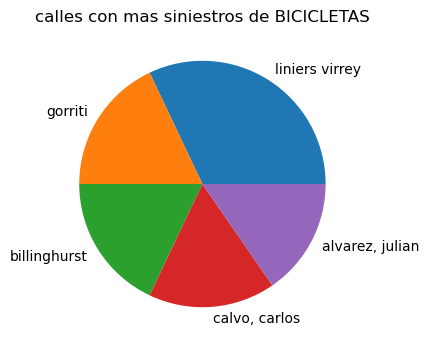

In [67]:
fig, ax = plt.subplots(figsize=(8,4))
ax.pie(x=bicis_calle['cant'],labels=bicis_calle['calle1'])
ax.set_title('calles con mas siniestros de BICICLETAS')

Ya tengo las calles mas peligrosas, para ver la comuna simplemente me fijo en el dataframe conseguido

In [68]:
bicis_calle

,calle1,comuna,cant
470,liniers virrey,5.0,25
377,gorriti,14.0,14
112,billinghurst,5.0,14
154,"calvo, carlos",3.0,13
47,"alvarez, julian",14.0,12


In [69]:
vacas = sin_df.loc[(sin_df['mes']==1) | (sin_df['mes']==2)]
no_vacas = sin_df.loc[(sin_df['mes']!=1) | (sin_df['mes']!=2)]

tot_vacas = len(vacas)
tot_no_vacas = len(no_vacas)

In [70]:
vacas['cant'] = 1
no_vacas['cant'] = 1
vacas_av = vacas.groupby(['calle1','comuna'])['cant'].sum().reset_index().sort_values(by='cant',ascending=False)
no_vacas_av = no_vacas.groupby(['calle1','comuna'])['cant'].sum().reset_index().sort_values(by='cant',ascending=False) 

C:\Users\Sistemas\AppData\Local\Temp\ipykernel_13308\33607852.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vacas['cant'] = 1


In [71]:
vacas_av['cant_vacas'] = (vacas_av['cant']/tot_vacas)*100
no_vacas_av['cant_no_vacas'] = (no_vacas_av['cant']/tot_no_vacas)*100

In [73]:
pd.merge(vacas_av, no_vacas_av, on=['calle1', 'comuna']).head(10)

,calle1,comuna,cant_x,cant_vacas,cant_y,cant_no_vacas
0,9 de julio av.,1.0,66,1.169591,362,1.089246
1,del libertador av.,14.0,64,1.134149,344,1.035085
2,"paz, gral. av.",9.0,60,1.063264,330,0.992959
3,paseo colon av.,1.0,56,0.992380,263,0.791358
4,"paz, gral. av.",12.0,54,0.956938,344,1.035085
5,"justo, juan b. av.",11.0,50,0.886054,223,0.671000
6,santa fe av.,14.0,49,0.868332,236,0.710116
7,del libertador av.,13.0,47,0.832890,238,0.716134
8,cabildo av.,13.0,47,0.832890,262,0.788349
9,san martin av.,15.0,45,0.797448,256,0.770295


Puedo notar que en Juan B Justo (comuna 11) y en General Paz (comuna 9) encuentro un aumento considerable de siniestros en vacaciones de verano, con lo cual en esas avenidas, al sur y norte de la comuna, ubicaria 4 controles policiales en verano, uno en cada mano.

La clusterizacion de las edades es algo mas extensa que lo que se pide en esta entrega, ya que por lo que estuve viendo, hay que categorizar y limpiar los features mas importantes, para luego hacer One Hot Encoding o Get Dummies y que el algoritmo pueda entrenar para dar cierto score.
En este caso estudiaré las edades de los siniestros en bicicleta, para por ejemplo hacer una campaña (o propaganda) sobre el uso del casco orientada a cierto grupo etario. 

In [441]:
bicis_edad = bicis.groupby(['edad','sexo'])['cant'].sum().reset_index()
bicis_edad.sort_values(by='cant',ascending=False,inplace=True)
bicis_edad = bicis_edad

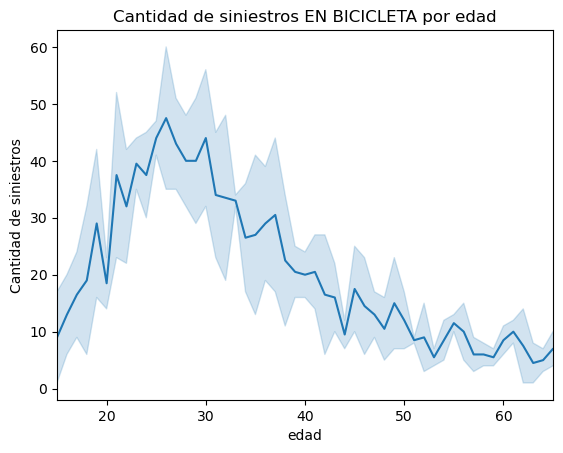

In [442]:
ax = sns.lineplot(data=bicis_edad, x='edad', y='cant')
ax.set_title('Cantidad de siniestros EN BICICLETA por edad')
ax.set_xlabel('edad')
ax.set_ylabel('Cantidad de siniestros')
ax.set_xbound(lower=15,upper=65)

Noto que entre los 25 y 35 años de edad tengo que apuntar mi campaña